## Observations and Insights 

#### Propriva had the least number of tests.  What did the tumor volume change over time look like?  What is the average number of tests per mouse compared to other drugs.

#### Capomulin and Ramicane had the highest number of tests with the lowest tumor volume at the last recorded reading, interested in starting tumor volume to the ending tumor volume for those two drug regimens.

#### A few additional questions I would be interested in answering:
* Metastatic Sites changes per Drug Regimen?
* Avg # tests per mouse per Drug Regimen
* Summary stats based on Starting Tumor Volume to Last Measurement per Drug Regimen
* Tumor volume vs. time point Average per Mouse per Drug Regimen (see line plot below, this would be an expansion of that)
* Any correlations pertaining to age?
* Ketapril- had the highest tumor volume variance as well as std error, deeper dive into start to end tumor volume

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merge_df[merge_df[['Mouse ID', 'Timepoint']].duplicated() == True]
dup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
print(dup_mouse)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   
1195     g989     Propriva  Female          21          26         25   
1380     g989     Propriva  Female          21          26         30   
1592     g989     Propriva  Female          21     

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexNames = merge_df[ merge_df['Mouse ID'] == 'g989' ].index
# Delete these row indexes from dataFrame
merge_df.drop(indexNames , inplace=True)
print(merge_df)

# Checking the number of mice in the clean DataFrame.
check_me = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
check_me

len(merge_df["Mouse ID"].unique())

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        b128    Capomulin  Female           9          22          0   
1        f932     Ketapril    Male          15          29          0   
2        g107     Ketapril  Female           2          29          0   
3        a457     Ketapril  Female          11          30          0   
4        c819     Ketapril    Male          21          25          0   
...       ...          ...     ...         ...         ...        ...   
1888     r944    Capomulin    Male          12          25         45   
1889     u364    Capomulin    Male          18          17         45   
1890     p438     Ceftamin  Female          11          26         45   
1891     x773      Placebo  Female          21          30         45   
1892     b879     Stelasyn  Female           4          26         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              45.000000         

248

In [7]:
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


## Summary Statistics

In [8]:
from scipy.stats import sem

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = merge_df.groupby(['Drug Regimen'])
dg_mean = drug_group["Tumor Volume (mm3)"].mean()
dg_median = drug_group["Tumor Volume (mm3)"].median()
dg_std_dev = drug_group["Tumor Volume (mm3)"].std()
dg_var = drug_group["Tumor Volume (mm3)"].var()
dg_sem = drug_group["Tumor Volume (mm3)"].sem()
# print(dg_mean)
# print(dg_median)
# print(dg_std_dev)
# print(dg_var)
# print(dg_sem)

drug_summary = pd.DataFrame({"Mean Tumor Volume": dg_mean, 
                               "Median Tumor Volume": dg_median,
                               "Tumor Volume Variance": dg_var, 
                               "Tumor Volume Std Dev": dg_std_dev,
                               "Tumor Volume Std Err": dg_sem})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_group.agg({"Tumor Volume (mm3)":['mean', 'median', 'std', 'var', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

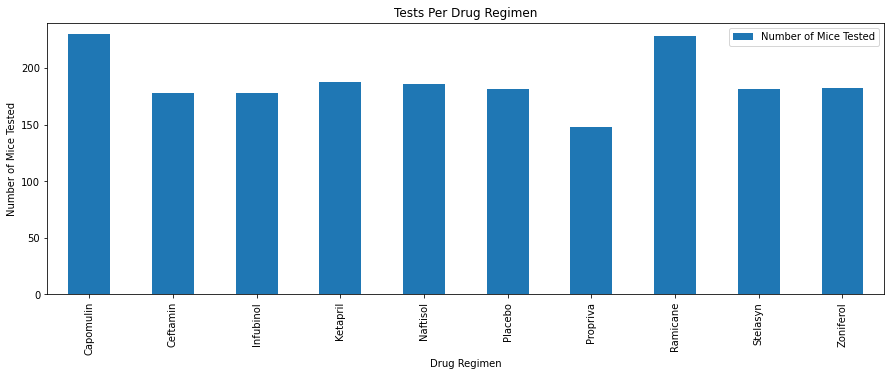

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group = merge_df.groupby(['Drug Regimen'])
tests = drug_group["Timepoint"].count()
tests_summary = pd.DataFrame({"Number of Mice Tested": tests})
tests_summary

#Plot with Pandas
tests_summary.plot(kind="bar", figsize=(15,5))

# Set x and y limits
plt.ylim(0, max(tests_summary["Number of Mice Tested"])+10)

# Set a Title and labels
plt.title("Tests Per Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

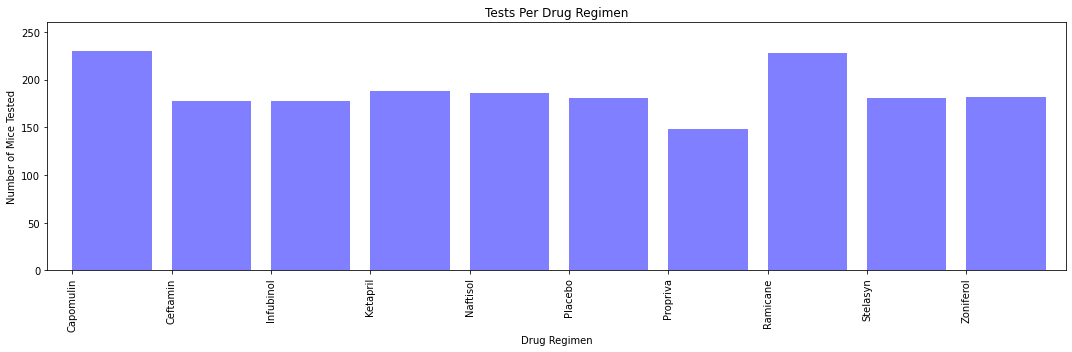

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_group = merge_df.groupby(['Drug Regimen'])
tests = drug_group["Timepoint"].count()
tests_summary = pd.DataFrame({"Number of Mice Tested": tests})

drug_list = tests_summary.index.tolist()
#print(drug_list)

nums= tests_summary["Number of Mice Tested"].tolist()
#print(nums)

x_axis = drug_list
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,5))
plt.bar(x_axis, nums, color='blue', alpha=0.5, align="edge")
plt.xticks(tick_locations, x_axis, rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(nums)+30)

# Set a Title and labels
plt.title("Tests Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Show the grap
plt.tight_layout()
plt.show()

#tests_summary

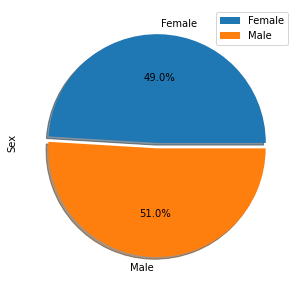

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_only= merge_df.loc[:, ["Sex", "Timepoint"]]
gender_only
gender_only.rename(columns = {'Timepoint' : 'Sex', "Sex": "Gender"}, inplace = True)
#print(gender_only)

gender_count = gender_only.groupby(["Gender"]).count()
#print(gender_count)
gender_summed = gender_count.sum()
#print(gender_summed)
gender_percent = (gender_count / gender_summed) *100
#print(gender_percent)

#Plot
gender_pie = gender_percent.plot.pie(y="Sex", autopct='%1.1f%%', explode=(0, 0.05), 
                   shadow=True, figsize=(5, 5))
plt.show()

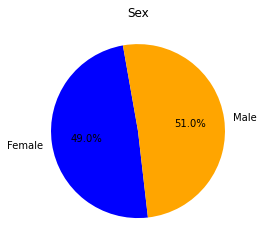

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_only= merge_df.loc[:, ["Sex", "Timepoint"]]
gender_only

gender_count = gender_only.groupby(["Sex"]).count()
#print(gender_count)
gender_summed = gender_count.sum()
#print(gender_summed)
gender_percent = (gender_count / gender_summed) *100
#print(gender_percent)
gender = gender_percent["Timepoint"]
#print(gender)

labels = ["Female", "Male"] 
colors = ["blue", "orange"]
plt.pie(gender, labels=labels, colors=colors, autopct="%1.1f%%", startangle=100)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_df= merge_df.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()
merged_data_df = max_tumor_df[['Mouse ID','Timepoint']].merge(merge_df,on=['Mouse ID','Timepoint'],how="left")
merged_data_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list: #list of drugs to check for
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_df.loc[merged_data_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    #print(final_tumor_vol)
    
    #add subset
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s potential outliers: {final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]}")
#tumor_vol_list 


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


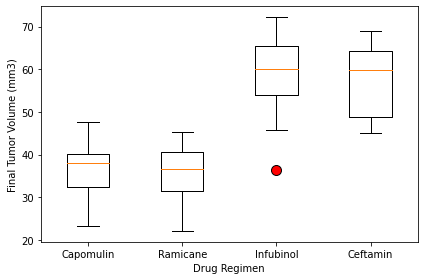

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers = dict(markerfacecolor='red',markersize=10)
plt.boxplot(tumor_vol_list,labels= treatment_list,flierprops=outliers)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

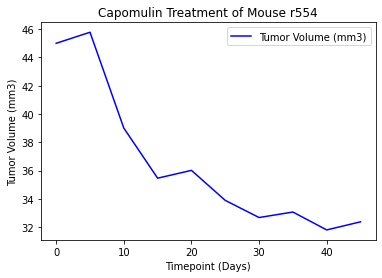

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = merge_df.loc[merge_df["Mouse ID"] == "r554", :]
#mouse

mouse_reduce = mouse[["Timepoint", "Tumor Volume (mm3)"]]
#mouse_reduce

mouse_reduce = mouse_reduce.plot.line(x='Timepoint', y='Tumor Volume (mm3)', color="blue")

plt.title("Capomulin Treatment of Mouse r554")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

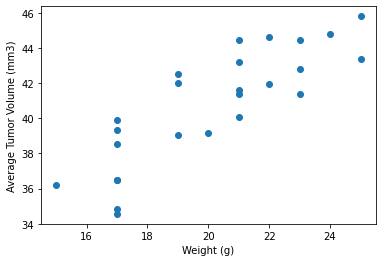

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_only = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :]
cap_only
scatter_df = cap_only[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]].groupby(["Mouse ID"]).mean()
scatter_df = scatter_df.reset_index()
scatter_df

plt.scatter(scatter_df.loc[:,"Weight (g)"],scatter_df.loc[:,"Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = scatter_df.iloc[:,1]
#print(weight)
avg_tumor_vol = scatter_df.iloc[:, 2]
avg_tumor_vol
correlation = st.pearsonr(weight,avg_tumor_vol)
print(f"The correlation between the mouse weight and average tumor volume for the Capomulin Drug Regimen is {round(correlation[0],2)}")

The correlation between the mouse weight and average tumor volume for the Capomulin Drug Regimen is 0.84


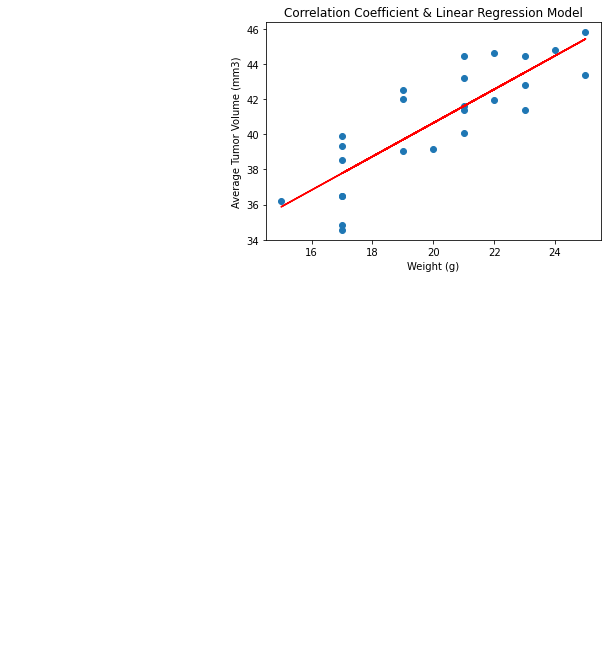

In [20]:
x_values = scatter_df.loc[:,'Weight (g)']
x_values
y_values = scatter_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Correlation Coefficient & Linear Regression Model')
plt.show()